### Mean Shift 개요

평균이동은 k-평균과 유사하게 중심을 군집의 중심으로 지속적으로 움직이면서 군집화를 수행

* 중심이동 방식

k-평균 - 중심에 소속된 데이터의 평균거리 중심으로 이동
평균이동 - 데이터가 모여 있는 밀도가 가장 높은 곳으로 중심을 이동


평균이동 군집화는 데이터의 분포도를 이용해 군집 중심점을 찾음

* 군집 중심점

데이터 포인트가 모여있는 곳이라는생각에서 착안
PDF를 이용
가장 집중적으로 데이터가 모여있어서 PDF가 피크인 점을 군집 중심점으로 선정
주어진 모델의 PDF를 찾기 위해 KDE(Kernel Density Estimation)를 이용

* 평균이동 군집화

특정 데이터를 반경 내의 데이터 분포 확률 밀도가 가장 높은 곳으로 이동하기 위해 주변 데이터와의 거리 값을 KDE 함수 값으로 입력한 뒤 그 변환 값을 현재 위치에서 업데이트하면서 이동하는 방식
이러한 방식을 전체 데이터에 반복적으로 적용하면서 데이터의 군집 중심점을 찾아냄

 ![nn](1.jpg)
 
 * KDE
 
 커널 함수를 통해 어떤 변수의 PDF를 추정하는 방법 
 
 관측된 데이터 각각에 커널 함수를 적용한 값을 모두 더한 뒤 데이터 건수로 나눠 PDF를 추정
 
 PDF는 확률 변수의 분포를 나타내는 함수로 널리 알려진 정규분포 함수를 포함해 감마분포, t-분포 등이 있음
 
 PDF를 알면 특정 변수가 어떤 값을 갖게 될지에 대한 확률을 알게 되므로 이를 통해 변수의 특성(정규분포의 경우 평균 분산),확률분포등 변수의 많은 요소를 알 수 있음
 
 ![nn](2.jpg)
 ![nn](3.jpg)
 KDE는 개별 관측 데이터에 커널 함수를 적용한 뒤, 이 적용 값을 모두 더한 후 개별 관측 데이터의 건수로 나눠 PDF를 추정
 
 대표적인 커널 함수로서 가우시안 분포 함수가 사용됨
 
 ![nn](4.jpg)
 K는 커널 함수, x는 확률 변숫값, xi는 관측값, h는 대역폭
 
 
 대역폭 h는 KDE형태를 부드러운(또는 뾰족한)형태로 평활화하는 데 적용
 h를 어떻게 설정하느냐에 따라 PDF추정 성능을 크게 좌우
 매우 작은 h값 - 좁고 뾰족한 KDE를 가짐 - 변동성이 큰 방식으로 PDF추정 - 과적합하기 쉬움
 매우 큰 h값 - 과도하게 평활화된 KDE를 가짐 - 지나치게 단순화된 방식으로 PDF추정 - 과소적합하기 쉬움
 ##### 적절한 KDE의 대역폭 h를 계산하는 것은 KDE기반의 평균이동 군집화에서 매우 중요
 ![nn](5.jpg)
 
평균 이동 군집화는 대역폭이 클수록 평활화된 KDE로 인해 적은 수의 군집 중심적을 가짐
군집의 개수를 지정하지 않으며 대역폭의 크기에 따라 군집화를 수행

* 사이킷런의 MeanShift클래스
평균이동군집화를 위한 클래스
가장 중요환 초기화 파라미터 - bandwidth - KDE의 h와 동일
최적의 대역폭 계산을 위해 estimate_bandwidth()함수를 제공

In [1]:
import numpy as np 
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift
#maek_blob()의 cluster_std를 0.7로 정한 3개 군집의 데이터에 대해 bandwidth를 0.8로 설정한 평균 이동 군집화 알고리즘을 적용한 예제
X, y = make_blobs(n_samples=200, n_features=2, centers=3, 
                  cluster_std=0.7, random_state=0)

meanshift= MeanShift(bandwidth=0.8)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2 3 4 5]


In [2]:
#군집이 6개로 분류됨 - 지나치게 세분화돼 군집화 되었음
#대역폭을 살짝 높인 1.0으로 해서 평균이동군집화를 다시 시행
meanshift= MeanShift(bandwidth=1)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2]


In [6]:
#3개의 군집으로 잘 군집화
from sklearn.cluster import estimate_bandwidth

best_bandwidth = estimate_bandwidth(X)#최적화된 bandwidth값 반환, 파라미터로는 데이터 세트 입력
print('bandwidth 값:', round(bandwidth,3))

bandwidth 값: 1.816


In [7]:
import pandas as pd


clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y

# estimate_bandwidth()로 최적의 bandwidth 계산

#estimate_bandwidth로 측정된 bandwith를 평균 이동 입력값으로 적용해 동일한 make_blobs()데이터 세트에 군집화를 수행
meanshift= MeanShift(bandwidth=best_bandwidth)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:',np.unique(cluster_labels))    

cluster labels 유형: [0 1 2]


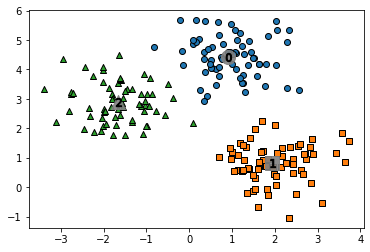

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

clusterDF['meanshift_label']  = cluster_labels
centers = meanshift.cluster_centers_#평균이동도 K-평균과 유사하게 중심을 가짐 - cluster_centers_속성으로 군집 중심 좌표를 표시
unique_labels = np.unique(cluster_labels)
markers=['o', 's', '^', 'x', '*']

for label in unique_labels:
    label_cluster = clusterDF[clusterDF['meanshift_label']==label]
    center_x_y = centers[label]
    # 군집별로 다른 마커로 산점도 적용
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', marker=markers[label] )
    
    # 군집별 중심 표현
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='gray', alpha=0.9, marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', marker='$%d$' % label)
    
plt.show()

In [9]:
print(clusterDF.groupby('target')['meanshift_label'].value_counts())
#타겟값과 군집 label값이 1대 1로 잘 매칭됨

target  meanshift_label
0       0                  67
1       1                  67
2       2                  66
Name: meanshift_label, dtype: int64


* 평균이동의 장점

더 유연한 군집화(데이터세트의 형태를 특정 형태로 가정한다든가, 특정 분포도 기반의 모델로 가정하지 않음)
이상치의 영향력도 크지 않음
미리 군집의 개수를 정할 필요도 없음
* 평균이동의 단점

알고리즘의 수행시간이 오래 걸림
band-width의 크기에 따른 군집화 영향도가 큼